# Case Study 4 - Segmentation of Credit Card Customers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
cust_credit_card = pd.read_csv("E:/CC_GENERAL.csv")

In [3]:
cust_credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
cust_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Numerical variables
numeric_var_names = [x for x in dict(cust_credit_card.dtypes) if dict(cust_credit_card.dtypes)[x] in ['float64', 'int64']]

# Categorical variables
cat_var_names = [x for x in dict(cust_credit_card.dtypes) if dict(cust_credit_card.dtypes)[x] in ['object']]

In [6]:
print(numeric_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [7]:
print(cat_var_names)

['CUST_ID']


In [8]:
numeric_data = cust_credit_card[numeric_var_names]
numeric_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
cat_data = cust_credit_card[cat_var_names]
cat_data.head()

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


In [10]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), 
        x.dropna().quantile(0.01), x.dropna().quantile(0.05), x.dropna().quantile(0.10), x.dropna().quantile(0.25),
        x.dropna().quantile(0.50), x.dropna().quantile(0.75), x.dropna().quantile(0.90), x.dropna().quantile(0.95),
        x.dropna().quantile(0.99),x.max()], 
        index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50'
               ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [11]:
numeric_data.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002049.71,1564.47,873.39,2081.53,4332774.97,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,7851.57,0.88,1.00,0.24,0.06,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8978683.26,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,5302314.47,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,8760896.46,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1209.54,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


### Outliers Treatment

In [12]:
# Outliers treatment
numeric_data = numeric_data.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [13]:
numeric_data.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,13792368.03,1541.05,873.39,1966.60,3867505.66,0.07,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9337.09,9338.80
BALANCE_FREQUENCY,8950.0,0.0,7858.85,0.88,1.00,0.23,0.05,0.09,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8379251.67,936.23,361.28,1525.19,2326189.83,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8961.80,8977.29
ONEOFF_PURCHASES,8950.0,0.0,4801619.28,536.49,38.00,1096.91,1203219.25,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6684.20,6689.90
INSTALLMENTS_PURCHASES,8950.0,0.0,3441260.40,384.50,89.00,676.27,457342.56,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3885.85,3886.24
CASH_ADVANCE,8950.0,0.0,8376492.70,935.92,0.00,1775.77,3153373.82,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9584.01,9588.16
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1199.45,0.13,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,0.83


### Missing Value Treatment

In [14]:
numeric_data['CREDIT_LIMIT'].fillna(numeric_data['CREDIT_LIMIT'].median(),inplace=True)
numeric_data['MINIMUM_PAYMENTS'].fillna(numeric_data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [15]:
print(numeric_data.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [16]:
cust_credit_card_new = pd.concat([cat_data, numeric_data], axis = 1)

In [17]:
cust_credit_card_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12


In [18]:
cust_credit_card_new.shape

(8950, 18)

## Deriving KPI

### Monthly Average Purchase and Cash Advance Amount

In [19]:
cust_credit_card_new['Monthly_avg_purchase'] = cust_credit_card_new['PURCHASES']/cust_credit_card_new['TENURE']
cust_credit_card_new['Monthly_cash_advance'] = cust_credit_card_new['CASH_ADVANCE']/cust_credit_card_new['TENURE']

In [20]:
cust_credit_card_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000


### Purchases by type (One-off, Installments)

In [21]:
cust_credit_card_new.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(15)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [22]:
cust_credit_card_new[(cust_credit_card_new['ONEOFF_PURCHASES']==0) & (cust_credit_card_new['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [23]:
cust_credit_card_new[(cust_credit_card_new['ONEOFF_PURCHASES']>0) & (cust_credit_card_new['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [24]:
cust_credit_card_new[(cust_credit_card_new['ONEOFF_PURCHASES']>0) & (cust_credit_card_new['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [25]:
cust_credit_card_new[(cust_credit_card_new['ONEOFF_PURCHASES']==0) & (cust_credit_card_new['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

##### There are 4 different types of purchase behavoiur
     1. People who do One-off purchases
     2. People who do Installment purchases
     3. People who do both one-off and installment purchases
     4. People who do None

In [26]:
def purchase(credit):   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'None'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'Both_Oneoff_Installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'One_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'Installment'

In [27]:
cust_credit_card_new['Purchase_Type'] = cust_credit_card_new.apply(purchase,axis=1)

In [28]:
cust_credit_card_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Purchase_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1.0,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,One_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_off


### Limt Usage (balance to credit limit ratio)

In [29]:
cust_credit_card_new['Limit_Usage'] = cust_credit_card_new['BALANCE']/cust_credit_card_new['CREDIT_LIMIT']

In [30]:
cust_credit_card_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Purchase_Type,Limit_Usage
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_off,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1.0,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,One_off,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_off,0.681429


### Payments to Minimum Payments Ratio

In [31]:
cust_credit_card_new['Payment_Minpay_ratio'] = cust_credit_card_new['PAYMENTS']/cust_credit_card_new['MINIMUM_PAYMENTS']

In [32]:
cust_credit_card_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Purchase_Type,Limit_Usage,Payment_Minpay_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_off,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,One_off,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_off,0.681429,2.771075


### Advanced Reporting : Insights on Customer Profile

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None, Installment, One_Off')

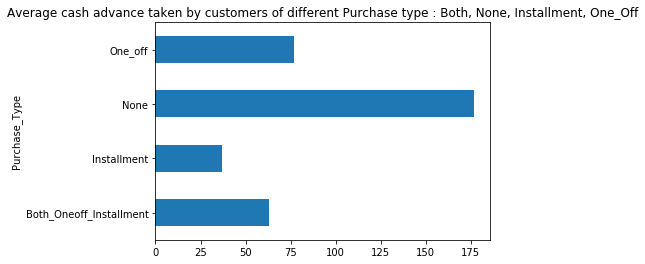

In [33]:
cust_credit_card_new.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None, Installment, One_Off')

##### Customers with None type take more cash on advance.

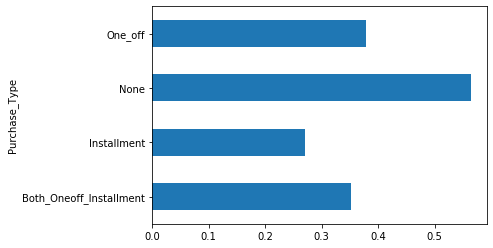

In [34]:
cust_credit_card_new.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage'])).plot.barh()

##### Customers having Installment purchase type have good credit score.

### Dummy Variable Creation

In [35]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [36]:
cat_var_names1 = [x for x in dict(cust_credit_card_new.dtypes) if dict(cust_credit_card_new.dtypes)[x] in ['object']]
cat_var_names1

['CUST_ID', 'Purchase_Type']

In [37]:
cat_data1 = cust_credit_card_new[cat_var_names1]
cat_data1.drop('CUST_ID', axis = 1, inplace = True)
cat_data1.head()

E:\MyPhoto\Analytics\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Purchase_Type
0,Installment
1,None
2,One_off
3,One_off
4,One_off


In [38]:
cat = [x for x in dict(cat_data1.dtypes) if dict(cat_data1.dtypes)[x] in ['object']]
cat

['Purchase_Type']

In [39]:
for c_feature in cat:
    cat_data1[c_feature] = cat_data1[c_feature].astype('category')
    cat_data1 = create_dummies(cat_data1,c_feature)

E:\MyPhoto\Analytics\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
cat_data1.head()

,Purchase_Type_Installment,Purchase_Type_None,Purchase_Type_One_off
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [41]:
cust_final_data = pd.concat([cust_credit_card_new, cat_data1], axis = 1)

In [42]:
cust_final_data.drop('Purchase_Type', axis = 1, inplace = True )
cust_final_data.drop('CUST_ID', axis = 1, inplace = True )

In [43]:
cust_final_data.drop('BALANCE', axis = 1, inplace = True )
cust_final_data.drop('PURCHASES', axis = 1, inplace = True )
cust_final_data.drop('CASH_ADVANCE', axis = 1, inplace = True )
cust_final_data.drop('CREDIT_LIMIT', axis = 1, inplace = True )
cust_final_data.drop('PAYMENTS', axis = 1, inplace = True )
cust_final_data.drop('MINIMUM_PAYMENTS', axis = 1, inplace = True )
cust_final_data.drop('PRC_FULL_PAYMENT', axis = 1, inplace = True )
cust_final_data.drop('TENURE', axis = 1, inplace = True )

In [44]:
cust_final_data.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,Limit_Usage,Payment_Minpay_ratio,Purchase_Type_Installment,Purchase_Type_None,Purchase_Type_One_off
0,0.818182,0.00,95.4,0.166667,0.000000,0.083333,0.000000,0,2.0,7.950000,0.000000,0.040901,1.446508,1,0,0
1,0.909091,0.00,0.0,0.000000,0.000000,0.000000,0.250000,4,0.0,0.000000,536.912124,0.457495,3.826241,0,1,0
2,1.000000,773.17,0.0,1.000000,1.000000,0.000000,0.000000,0,12.0,64.430833,0.000000,0.332687,0.991682,0,0,1
3,0.636364,1499.00,0.0,0.083333,0.083333,0.000000,0.083333,1,1.0,124.916667,17.149001,0.222223,0.000000,0,0,1
4,1.000000,16.00,0.0,0.083333,0.083333,0.000000,0.000000,0,1.0,1.333333,0.000000,0.681429,2.771075,0,0,1


In [45]:
cust_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   int64  
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  Limit_Usage                       8950 non-null   float64
 12  Paymen

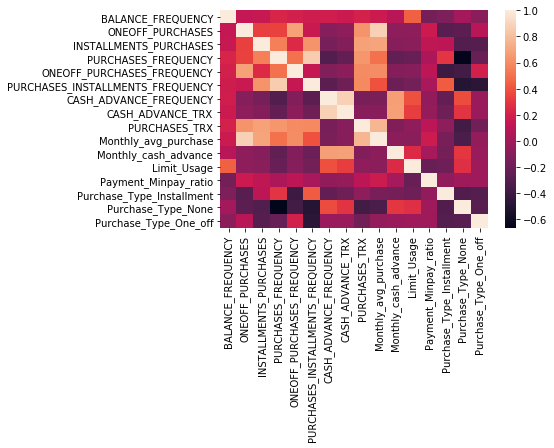

In [46]:
sns.heatmap(cust_final_data.corr())

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cust_scaled = sc.fit_transform(cust_final_data)

In [48]:
from sklearn.decomposition import PCA

In [49]:
var_ratio={}
for n in range(4,15):
    pc = PCA(n_components=n)
    cust_pca = pc.fit(cust_scaled)
    var_ratio[n] = sum(cust_pca.explained_variance_ratio_)

In [50]:
pc = PCA(n_components = 5)

In [51]:
p = pc.fit(cust_scaled)

In [52]:
cust_scaled.shape

(8950, 16)

In [53]:
p.explained_variance_

array([5.05252098, 2.89137783, 2.1099688 , 1.36444133, 1.14843905])

In [54]:
var_ratio

{4: 0.71356457216468,
 5: 0.7853339929282821,
 6: 0.8326457027225089,
 7: 0.8720916497976557,
 8: 0.9031544886877961,
 9: 0.9293714596588178,
 10: 0.9527637722223287,
 11: 0.9673828862863735,
 12: 0.9801967585469207,
 13: 0.9897403423262544,
 14: 0.9966262010143281}

##### Since 7 components is giving about 87% variance, so we will select 7 components 

In [55]:
pc_final = PCA(n_components=7).fit(cust_scaled)

reduced_data = pc_final.fit_transform(cust_scaled)

In [56]:
reduced_data

array([[-0.68004288, -2.22981593, -0.24433019, ...,  0.20557095,
        -0.32684111,  0.19944596],
       [-2.93019778,  1.24460016, -0.48830023, ..., -0.71162827,
        -0.33164961, -0.30238472],
       [ 1.06860976,  0.2176639 ,  2.54922381, ...,  1.11025759,
         0.56537385, -1.17016812],
       ...,
       [ 0.56577722, -2.31100277, -1.15532465, ...,  0.65867734,
        -0.08116792, -0.40971958],
       [-2.0949371 , -0.63410183,  0.43939682, ..., -1.48928634,
        -0.70357901, -0.80611967],
       [ 0.50543433,  0.86734425,  2.36531486, ...,  1.38431628,
        -0.56853641, -0.03991981]])

In [57]:
data = pd.DataFrame(reduced_data)

In [58]:
data.shape

(8950, 7)

In [59]:
data.head()

,0,1,2,3,4,5,6
0,-0.680043,-2.229816,-0.244330,0.146055,0.205571,-0.326841,0.199446
1,-2.930198,1.244600,-0.488300,0.867171,-0.711628,-0.331650,-0.302385
2,1.068610,0.217664,2.549224,-1.629530,1.110258,0.565374,-1.170168
3,-0.684887,-0.514511,2.478426,-0.072925,0.702937,-0.765849,1.053726
4,-1.321277,-0.616007,1.669566,-1.627496,0.283209,0.770452,1.021366


In [60]:
columns = cust_final_data.columns

In [61]:
columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'Limit_Usage', 'Payment_Minpay_ratio',
       'Purchase_Type_Installment', 'Purchase_Type_None',
       'Purchase_Type_One_off'],
      dtype='object')

In [62]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(7)],index=columns)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
BALANCE_FREQUENCY,0.065665,0.271507,-0.188773,-0.503997,-0.132500,0.440100,-0.170537
ONEOFF_PURCHASES,0.283981,0.273171,0.274911,0.067376,-0.087367,-0.154464,0.094658
INSTALLMENTS_PURCHASES,0.321231,0.099303,-0.211469,0.137094,-0.141896,-0.102937,0.411093
PURCHASES_FREQUENCY,0.379814,-0.022822,-0.190814,-0.090396,0.226971,0.127280,-0.283867
ONEOFF_PURCHASES_FREQUENCY,0.272933,0.243907,0.311243,-0.092871,0.088877,0.023853,-0.423550
PURCHASES_INSTALLMENTS_FREQUENCY,0.331325,-0.077552,-0.393527,0.008477,0.075001,0.057996,-0.116578
CASH_ADVANCE_FREQUENCY,-0.214260,0.411821,-0.194006,0.119837,0.229932,-0.034687,-0.047433
CASH_ADVANCE_TRX,-0.182342,0.407531,-0.204128,0.157582,0.313987,-0.066587,-0.048946
PURCHASES_TRX,0.367752,0.203220,-0.041252,0.041436,-0.084882,-0.105858,0.024638
Monthly_avg_purchase,0.353746,0.250366,0.106724,0.116983,-0.121518,-0.170903,0.292597


### Cluster 4

In [63]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=10)
km_4.fit(reduced_data)
km_4.labels_

array([2, 0, 1, ..., 2, 0, 1])

In [64]:
pd.Series(km_4.labels_).value_counts()

2    3319
0    2457
1    1916
3    1258
dtype: int64

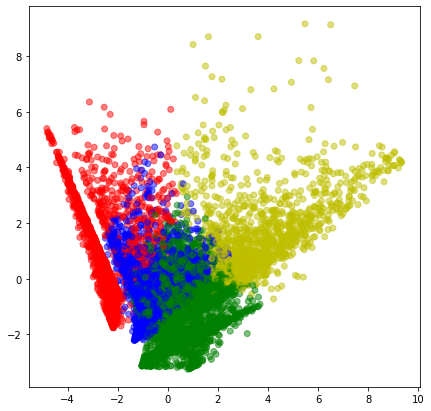

In [65]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [66]:
col_kpi = ['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','Limit_Usage','CASH_ADVANCE_TRX',
         'Payment_Minpay_ratio','Purchase_Type_Installment','Purchase_Type_None','Purchase_Type_One_off','CREDIT_LIMIT']

In [67]:
samp_data = pd.concat([cust_credit_card_new, cat_data1], axis = 1)

In [68]:
cluster_4 = pd.concat([samp_data[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [69]:
cluster_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,Limit_Usage,CASH_ADVANCE_TRX,Payment_Minpay_ratio,Purchase_Type_Installment,Purchase_Type_None,Purchase_Type_One_off,CREDIT_LIMIT,Cluster_4
0,2.0,7.950000,0.000000,0.040901,0,1.446508,1,0,0,1000.0,2
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,1,0,7000.0,0
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,1,7500.0,1
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,1,7500.0,1
4,1.0,1.333333,0.000000,0.681429,0,2.771075,0,0,1,1200.0,1


In [70]:
cluster_4_set = cluster_4.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean()).T
cluster_4_set

Cluster_4,0,1,2,3
PURCHASES_TRX,1.428571,6.527406,13.590693,52.091320
Monthly_avg_purchase,8.170872,56.750102,56.241191,322.343110
Monthly_cash_advance,210.406016,48.057739,24.188803,58.541155
Limit_Usage,0.574581,0.367933,0.277586,0.325847
CASH_ADVANCE_TRX,7.540904,1.718685,0.842724,2.338633
Payment_Minpay_ratio,5.119167,4.867525,4.363723,10.459765
Purchase_Type_Installment,0.031339,0.000000,0.653811,0.010334
Purchase_Type_None,0.831095,0.000000,0.000000,0.000000
Purchase_Type_One_off,0.047619,0.886221,0.000000,0.046900
CREDIT_LIMIT,4399.925383,4205.665528,3639.155262,7231.756757


##### The people in Cluster 3 is having higher monthly avergae purchase whereas the group of people in Cluster 1 and Cluster 2 is having similar purchase average.

### Cluster 5

In [71]:
km_5 = KMeans(n_clusters=5,random_state=20)
km_5 = km_5.fit(reduced_data)
km_5.labels_

array([1, 4, 0, ..., 1, 4, 0])

In [72]:
pd.Series(km_5.labels_).value_counts()

1    3319
0    1867
4    1814
3    1149
2     801
dtype: int64

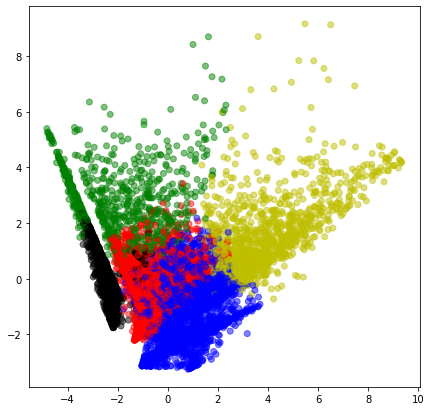

In [73]:
color_map = {0:'r',1:'b',2:'g',3:'y',4:'k'}
label_color = [color_map[l] for l in km_5.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [74]:
cluster_5 = pd.concat([samp_data[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [75]:
cluster_5.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,Limit_Usage,CASH_ADVANCE_TRX,Payment_Minpay_ratio,Purchase_Type_Installment,Purchase_Type_None,Purchase_Type_One_off,CREDIT_LIMIT,Cluster_5
0,2.0,7.950000,0.000000,0.040901,0,1.446508,1,0,0,1000.0,1
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,1,0,7000.0,4
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,1,7500.0,0
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,1,7500.0,0
4,1.0,1.333333,0.000000,0.681429,0,2.771075,0,0,1,1200.0,0


In [76]:
cluster_5_set = cluster_5.groupby('Cluster_5').apply(lambda x: x[col_kpi].mean()).T
cluster_5_set

Cluster_5,0,1,2,3,4
PURCHASES_TRX,6.541248,13.734712,8.742821,53.652637,0.114112
Monthly_avg_purchase,56.747046,56.850557,50.699182,334.839670,0.554914
Monthly_cash_advance,36.905113,21.116103,433.141474,39.598512,127.641906
Limit_Usage,0.355546,0.276010,0.609339,0.312446,0.562826
CASH_ADVANCE_TRX,1.332619,0.749925,16.434457,1.504787,4.239250
Payment_Minpay_ratio,4.957031,4.379019,3.860361,10.941378,5.563958
Purchase_Type_Installment,0.000000,0.650497,0.106117,0.010444,0.002205
Purchase_Type_None,0.000000,0.000000,0.333333,0.000000,0.978501
Purchase_Type_One_off,0.872523,0.000000,0.234707,0.049608,0.000000
CREDIT_LIMIT,4145.342877,3622.086867,6718.352060,7287.597911,3599.044469


##### People in Cluster 1 and Cluster 4 are having similar credit limit. Cluster 4 is having the highest average purchase.

### Cluster 6

In [77]:
km_6 = KMeans(n_clusters=6,random_state=30)
km_6 = km_6.fit(reduced_data)
km_6.labels_

array([3, 4, 0, ..., 3, 4, 0])

In [78]:
pd.Series(km_6.labels_).value_counts()

3    2260
4    1834
2    1778
0    1747
5     766
1     565
dtype: int64

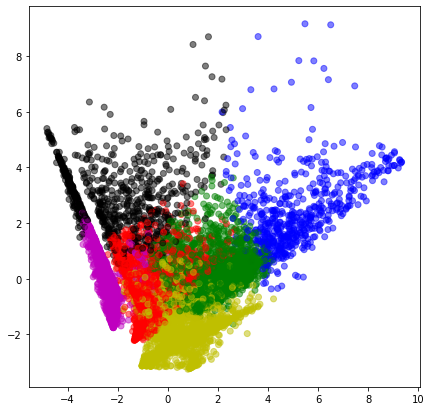

In [79]:
color_map = {0:'r',1:'b',2:'g',3:'y',4:'m',5:'k'}
label_color = [color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [80]:
cluster_6 = pd.concat([samp_data[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)
cluster_6.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,Limit_Usage,CASH_ADVANCE_TRX,Payment_Minpay_ratio,Purchase_Type_Installment,Purchase_Type_None,Purchase_Type_One_off,CREDIT_LIMIT,Cluster_6
0,2.0,7.950000,0.000000,0.040901,0,1.446508,1,0,0,1000.0,3
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,1,0,7000.0,4
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,1,7500.0,0
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,1,7500.0,0
4,1.0,1.333333,0.000000,0.681429,0,2.771075,0,0,1,1200.0,0


In [81]:
cluster_6_set = cluster_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
cluster_6_set

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,5.872925,70.688248,24.775051,11.294248,0.158670,8.603133
Monthly_avg_purchase,54.451309,469.980188,124.125741,44.008155,0.779409,50.564620
Monthly_cash_advance,37.584513,50.255051,28.056697,20.182201,127.086922,444.315111
Limit_Usage,0.345846,0.344469,0.336964,0.241843,0.563886,0.612606
CASH_ADVANCE_TRX,1.347453,1.801770,1.216535,0.606637,4.241549,16.808094
Payment_Minpay_ratio,5.059057,13.456692,5.903164,4.199536,5.535412,3.871577
Purchase_Type_Installment,0.000000,0.017699,0.002250,0.955310,0.002181,0.108355
Purchase_Type_None,0.000000,0.000000,0.000000,0.000000,0.969466,0.344648
Purchase_Type_One_off,0.935318,0.065487,0.009561,0.000000,0.000000,0.242820
CREDIT_LIMIT,4162.481483,8417.345133,5005.564077,3226.952825,3592.484551,6834.856397


In [82]:
from sklearn.metrics import silhouette_score

In [83]:
score={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_data)
    score[n]=silhouette_score(reduced_data,km_score.labels_)

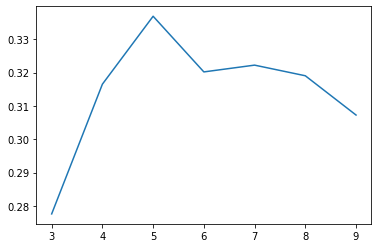

In [84]:
pd.Series(score).plot()

## Marketing Strategy

### Group 3
The customers in Group 3 is having comparatively less limit usage which means good credit score.

### Group 0
The customers in Group 0 is having poor credit score and is taking mainly cash on advance.

### Group 1
The customers in this group is doing mostly one off transactions.

### Group 2
The customers in Group 2 is having good credit score and we can increase the Credit Limit for this group.